In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 144

import requests
import pandas as pd
import numpy as np

In [2]:
ENDPOINT = "http://localhost:8081/add"

REPEAT = 10
NS = range(0, 11)

data = [requests.get(ENDPOINT, {"n": n, "async": async}).json()
        for _ in xrange(REPEAT)
        for n in NS
        for async in (0, 1)]

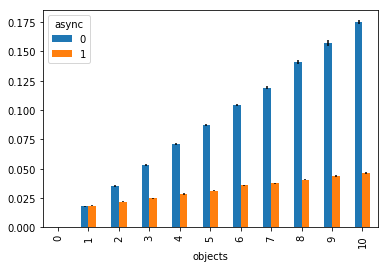

In [3]:
def drop_highest(series):
    return series.nsmallest(len(series) - 1)

df = pd.DataFrame(data)

times = (df.groupby(["async", "objects"])["time"]
     .apply(drop_highest)
     .groupby(level=("async", "objects"))
     .aggregate(['mean', 'std', 'count']))

times.loc[:, "stderr"] = times["std"] / np.sqrt(times["count"])
times = times.unstack(level="async")
times["mean"].plot.bar(yerr=times["stderr"])